In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Xử lý dữ liệu

In [2]:
df = pd.read_csv(r'C:\Users\Admin\khoa4\test1\Test1\loans_full_schema.csv')


In [3]:
df.shape

(10000, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [5]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

### Exploratory Data Analysis (EDA)

In [6]:
summary_by_loan_purpose = df.groupby(["loan_purpose"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'number_of_borrowers','sum':'total_loan_amount'})

In [7]:
summary_by_loan_purpose.sort_values('number_of_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_loan_purpose

,loan_purpose,number_of_borrowers,total_loan_amount
0,renewable_energy,10,140000
1,vacation,62,421900
2,moving,69,682675
3,small_business,125,2477500
4,car,131,1361250
5,house,151,2689275
6,medical,162,1836800
7,major_purchase,303,4752425
8,home_improvement,680,11719225
9,other,914,11819025


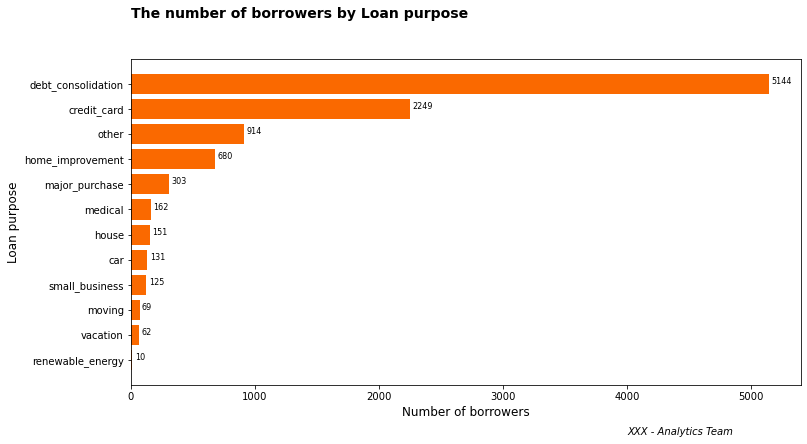

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('loan_purpose', 'number_of_borrowers', data=summary_by_loan_purpose, color='#FA6900')

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_loan_purpose.number_of_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('The number of borrowers by Loan purpose', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Number of borrowers', size=12)
plt.ylabel('Loan purpose', size=12)
plt.text(0.7, 0.01, "XXX - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

Khoản vay chủ yếu nhất là hợp nhất nợ (debt_consolidation) ~> Xu hướng là khi đi vay thì vay cho nhiều mục đích khác nhau

In [9]:
df.groupby(['grade'])[["interest_rate"]].mean()

,interest_rate
grade,
A,6.742631
B,10.524103
C,14.176698
D,19.113451
E,25.103403
F,29.401897
G,30.802500


In [10]:
summary_by_grade = df.groupby(["grade"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'number_of_borrowers','sum':'total_loan_amount'})

In [11]:
summary_by_grade.sort_values('number_of_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_grade

,grade,number_of_borrowers,total_loan_amount
0,G,12,305150
1,F,58,1271525
2,E,335,6117450
3,D,1446,24024175
4,A,2459,37867450
5,C,2653,44678275
6,B,3037,49355200


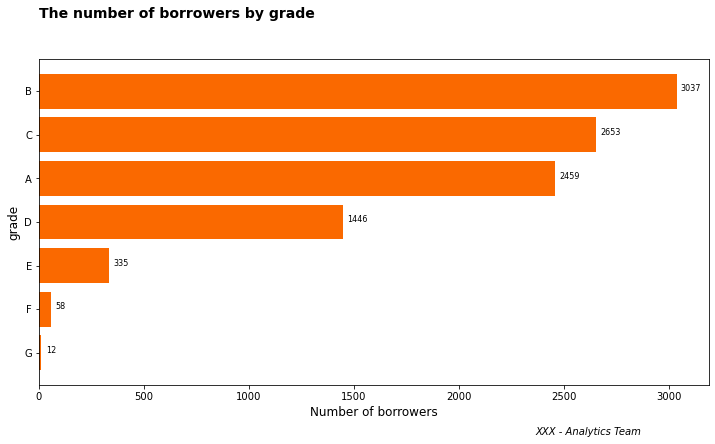

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('grade', 'number_of_borrowers', data=summary_by_grade, color='#FA6900')

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_grade.number_of_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('The number of borrowers by grade', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Number of borrowers', size=12)
plt.ylabel('grade', size=12)
plt.text(0.7, 0.01, "XXX - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [13]:
df.groupby(['sub_grade'])[["interest_rate"]].mean()

,interest_rate
sub_grade,
A1,5.315545
A2,6.075625
A3,6.716190
A4,7.345722
A5,7.965649
B1,9.435672
B2,9.926113
B3,10.416407
B4,10.905267


In [14]:
summary_by_sub_grade = df.groupby(["sub_grade"], as_index=False)\
    ["loan_amount"]\
    .agg([np.size, np.sum]).reset_index().rename(columns={'size':'number_of_borrowers','sum':'total_loan_amount'})

In [15]:
summary_by_sub_grade.sort_values('number_of_borrowers', ascending=True, inplace=True, ignore_index=True)

summary_by_sub_grade

,sub_grade,number_of_borrowers,total_loan_amount
0,G4,1,35000
1,F5,4,92175
2,F4,5,72750
3,F3,9,190050
4,F2,9,202200
5,G1,11,270150
6,F1,31,714350
7,E1,41,522800
8,E2,57,979400
9,E4,73,1428525


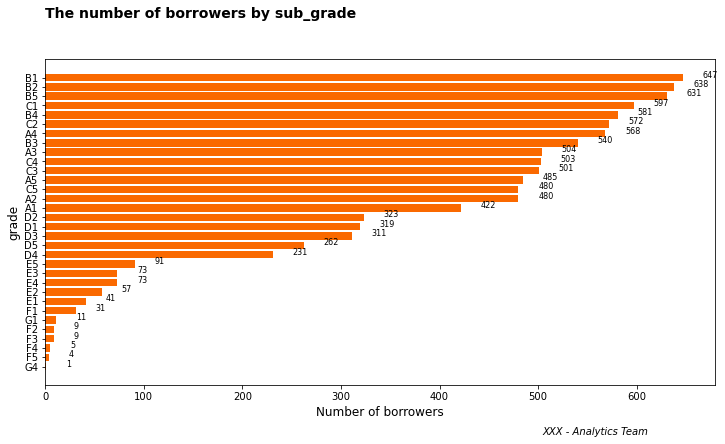

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh('sub_grade', 'number_of_borrowers', data=summary_by_sub_grade, color='#FA6900')

i = 0
for p in bar1.patches:
    t1 = ax.annotate(summary_by_sub_grade.number_of_borrowers[i], xy=(p.get_width()+20, p.get_y()+p.get_height()/2)) # số 200 ở đây tùy scale của chart mà ta tinh chỉnh để số liệu tách ra xa khỏi bar cho đẹp
    t1.set(size=8)
    i+=1
    
plt.suptitle('The number of borrowers by sub_grade', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Number of borrowers', size=12)
plt.ylabel('grade', size=12)
plt.text(0.7, 0.01, "XXX - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [17]:
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [18]:
data = df.loc[:,['interest_rate','loan_amount','term','grade','sub_grade','annual_income','homeownership','verified_income','debt_to_income']]

In [19]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,C,C3,90000.0,MORTGAGE,Verified,18.01
1,12.61,5000,36,C,C1,40000.0,RENT,Not Verified,5.04
2,17.09,2000,36,D,D1,40000.0,RENT,Source Verified,21.15
3,6.72,21600,36,A,A3,30000.0,RENT,Not Verified,10.16
4,14.07,23000,36,C,C3,35000.0,RENT,Verified,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,A,A4,108000.0,RENT,Source Verified,22.28
9996,19.03,10000,36,D,D3,121000.0,MORTGAGE,Verified,32.38
9997,23.88,30000,36,E,E2,67000.0,MORTGAGE,Verified,45.26
9998,5.32,24000,36,A,A1,80000.0,MORTGAGE,Source Verified,11.99


In [20]:
data.isnull().sum()

interest_rate       0
loan_amount         0
term                0
grade               0
sub_grade           0
annual_income       0
homeownership       0
verified_income     0
debt_to_income     24
dtype: int64

In [21]:
mean_value=data['debt_to_income'].mean()
data['debt_to_income'].fillna(value=mean_value, inplace=True)
data.isnull().sum()

interest_rate      0
loan_amount        0
term               0
grade              0
sub_grade          0
annual_income      0
homeownership      0
verified_income    0
debt_to_income     0
dtype: int64

In [22]:
list_lable = ['grade', 'sub_grade', 'homeownership', 'verified_income']
for i in list_lable:
    data[i] = LabelEncoder().fit_transform(data[i])

In [23]:
data

,interest_rate,loan_amount,term,grade,sub_grade,annual_income,homeownership,verified_income,debt_to_income
0,14.07,28000,60,2,12,90000.0,0,2,18.01
1,12.61,5000,36,2,10,40000.0,2,0,5.04
2,17.09,2000,36,3,15,40000.0,2,1,21.15
3,6.72,21600,36,0,2,30000.0,2,0,10.16
4,14.07,23000,36,2,12,35000.0,2,2,57.96
...,...,...,...,...,...,...,...,...,...
9995,7.35,24000,36,0,3,108000.0,2,1,22.28
9996,19.03,10000,36,3,17,121000.0,0,2,32.38
9997,23.88,30000,36,4,21,67000.0,0,2,45.26
9998,5.32,24000,36,0,0,80000.0,0,1,11.99


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   interest_rate    10000 non-null  float64
 1   loan_amount      10000 non-null  int64  
 2   term             10000 non-null  int64  
 3   grade            10000 non-null  int32  
 4   sub_grade        10000 non-null  int32  
 5   annual_income    10000 non-null  float64
 6   homeownership    10000 non-null  int32  
 7   verified_income  10000 non-null  int32  
 8   debt_to_income   10000 non-null  float64
dtypes: float64(3), int32(4), int64(2)
memory usage: 547.0 KB


#### Check correlation

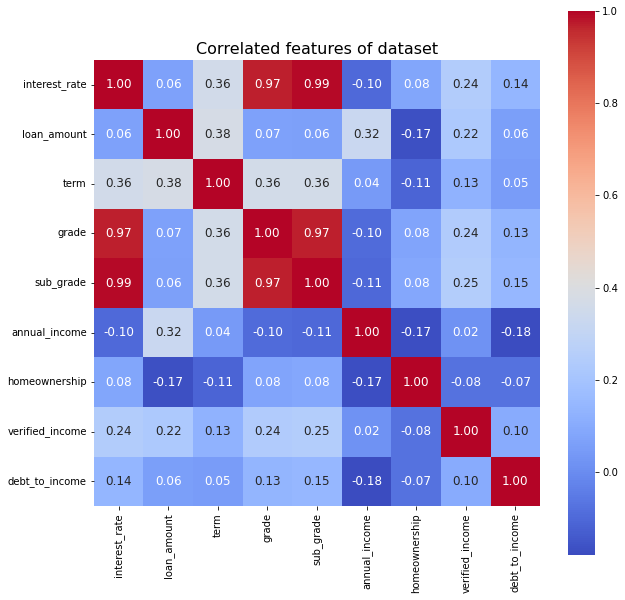

In [25]:
corr = data.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlated features of dataset', size=16)
plt.show()

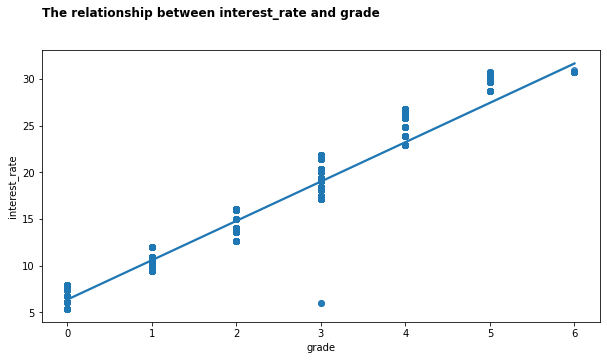

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['grade'], y=data['interest_rate'], data=data)

plt.suptitle('The relationship between interest_rate and grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()


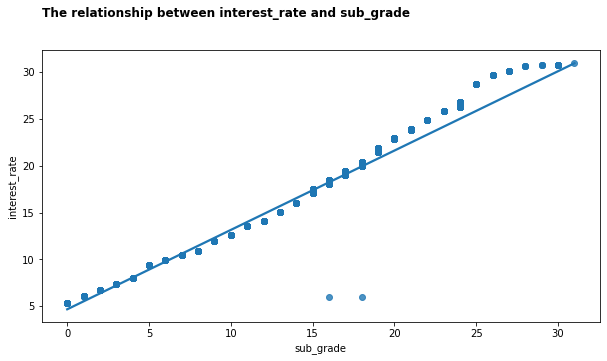

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.regplot(x=data['sub_grade'], y=data['interest_rate'], data=data)
plt.suptitle('The relationship between interest_rate and sub_grade', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()


In [28]:
pearson_coef, p_value = stats.pearsonr(data['grade'], data['interest_rate'])
print("Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Correlation Coefficient:  0.9694016378508052
P-value:  0.0


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
X = np.array(data['sub_grade']).reshape(-1,1)
y = np.array(data['interest_rate']).reshape(-1,1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lin_reg.predict(X_test)

In [34]:
y_pred

array([[20.77247397],
       [11.44256395],
       [ 7.20169576],
       ...,
       [ 8.89804304],
       [ 6.35352213],
       [13.13891123]])

In [35]:
intercept = lin_reg.intercept_
print(intercept)

[4.65717485]


In [36]:
slopes = lin_reg.coef_
print(slopes)

[[0.84817364]]


In [37]:
print('The full R-square is : ' +str((lin_reg.score(X,y)*100).round(5)) + '%')
print('The train R-square is : ' +str((lin_reg.score(X_train, y_train)*100).round(5)) + '%')
print('The test R-square is : ' +str((lin_reg.score(X_test, y_test)*100).round(5)) + '%')

The full R-square is : 98.58906%
The train R-square is : 98.54677%
The test R-square is : 98.7577%


In [38]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print('The MSE of interest_rate and predicted value is : ',mse.round(3))
print('The MAE of interest_rate and predicted value is : ',mae.round(3))

The MSE of interest_rate and predicted value is :  0.311
The MAE of interest_rate and predicted value is :  0.45


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# X = data['sub_grade']
# y = data['interest_rate']
X = np.array(data['sub_grade']).reshape(-1,1)
y = np.array(data['interest_rate']).reshape(-1,1)

In [41]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [42]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [43]:
scaler

StandardScaler()

In [44]:
X_scaled = scaler.transform(X)

In [45]:
X_scaled

array([[ 0.48563584],
       [ 0.14404771],
       [ 0.99801804],
       ...,
       [ 2.02278243],
       [-1.56389293],
       [-0.19754042]])

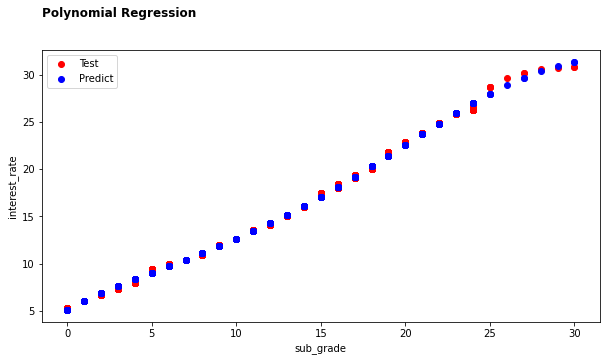

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_test, y_test, color='red', label='Test')
ax.scatter(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue', label='Predict')
plt.xlabel('sub_grade')
plt.ylabel('interest_rate')
ax.legend()
plt.suptitle('Polynomial Regression', fontweight='bold', size=12, horizontalalignment='left', x=0.125, y = 1)
plt.show()

In [47]:
print('The full R-square is : ' +str((r2_score(y, pol_reg.predict(poly_reg.fit_transform(X)))*100).round(5)) + '%')
print('The train R-square is : ' +str((r2_score(y_train, pol_reg.predict(poly_reg.fit_transform(X_train)))*100).round(5)) + '%')
print('The test R-square is : ' +str((r2_score(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))*100).round(5)) + '%')

The full R-square is : 99.66587%
The train R-square is : 99.63015%
The test R-square is : 99.80847%


In [48]:
#Find MSE , MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
mae = mean_absolute_error(y_test, pol_reg.predict(poly_reg.fit_transform(X_test)))
print('The MSE of interest_rate and predicted value is : ',mse.round(5))
print('The MAE of interest_rate and predicted value is : ',mae.round(5))

The MSE of interest_rate and predicted value is :  0.04797
The MAE of interest_rate and predicted value is :  0.17857
